# Prediccion de la diabetes (Solucion)

### Paso 1: Carga del conjunto de datos

Cargamos la data y visualizamos

In [2]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Paso 2: Realiza un EDA completo


Para ello, veamos cuanta informacion tiene nuestro DataFrame

In [24]:
# Obtener dimensiones
total_data.shape

(768, 9)

In [25]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
total_data.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Lo anterior revela que el DataFrame contiene 768 registros (numero total de filas) y 9 variables observadas (numero total de columnas), de las cuales sabemos que:

+ Todas las variables son del tipo numerico.

+ la variables Outcome es del tipo categorico cuyos valores que puede tomar es de 0,1; siendo 0 negativo en la presencia de la diabetes y 1 es positivo en la presencia de diabetes.

Adicionalmente no existen valores faltantes en la data.


#### Analisis de estadisticos univariados

Para ellos estudiaremos laas variables

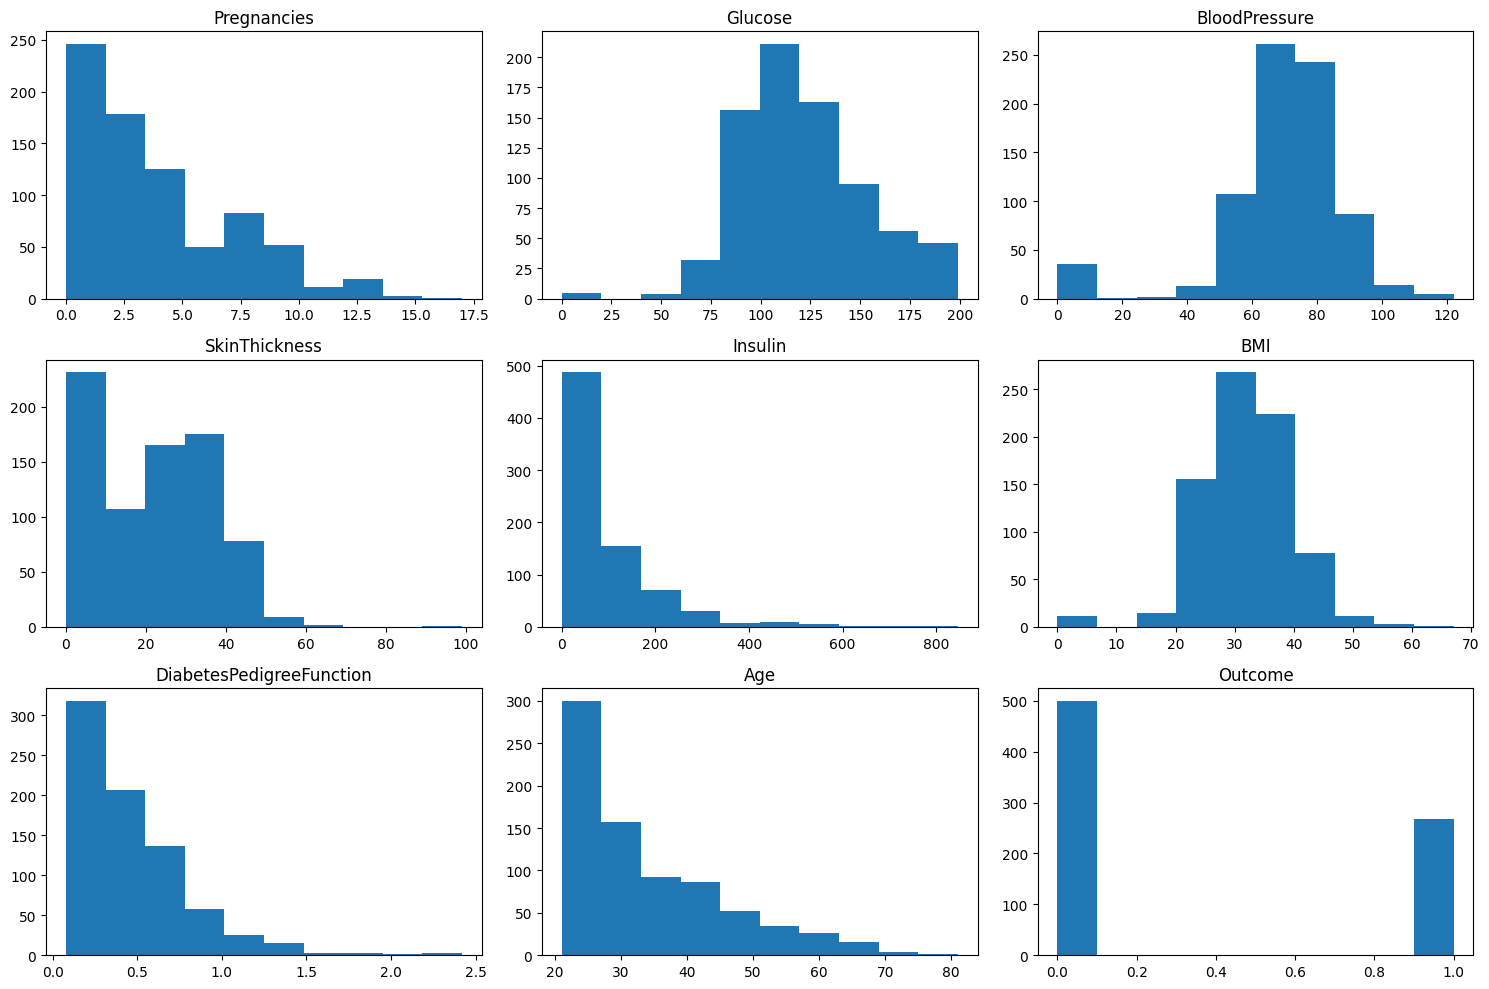

In [27]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns   

# Obtener las columnas numericas **antes** de llamar a la funcion
numeric_cols = total_data.select_dtypes(include=['number']).columns 

def plot_histograms(data, cols, rows, figsize=(15, 10)):
    """
    Crea una cuadricula de histogramas para las columnas numericas de un DataFrame.

    Args:
        data: DataFrame con los datos.
        cols: Numero de columnas en la cuadricula.
        rows: Numero de filas en la cuadricula.
        figsize: Tamaño de la figura.
    """

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols, i+1)
        plt.hist(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Crear una cuadrícula de 3x3
plot_histograms(total_data, cols=3, rows=3)

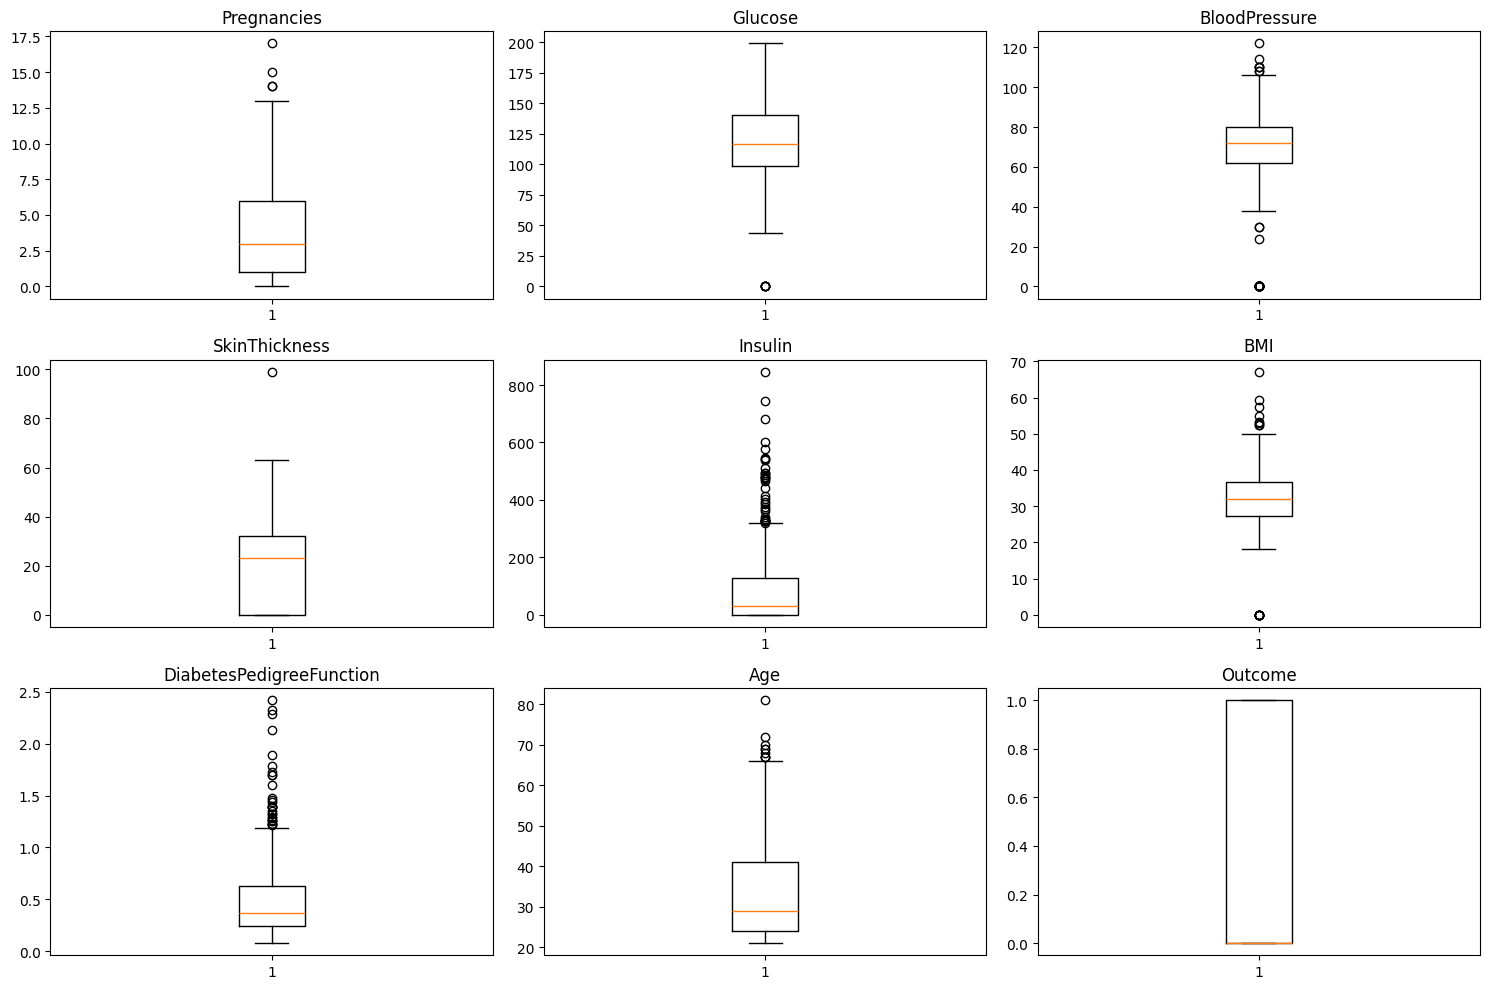

In [28]:
# Obtener las columnas numericas **antes** de llamar a la funcion
# numeric_cols = total_data.select_dtypes(include=['number']).columns 

def plot_boxplots(data, cols, rows, figsize=(15, 10)):
    """
    Crea una cuadricula de diagramas de caja para las columnas numericas de un DataFrame.

    Args:
        data: DataFrame con los datos.
        cols: Numero de columnas en la cuadricula.
        rows: Numero de filas en la cuadricula.
        figsize: Tamaño de la figura.
    """

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols, i+1)
        plt.boxplot(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Crear una cuadrícula de 3x3
plot_boxplots(total_data, cols=3, rows=3)

De los graficos anteriores podemos indicar que:


+ Variable `Pregnancies`: la distribucion del numero de embarazos de los pacientes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Glucose`: la distribucion de la concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa posee un comportamiento simetrico y no posee valores extremos.

+ Variable `BloodPressure`: la diostribucion de la presión arterial diastólica (medida en mm Hg) posee un comportamiento simetrico y posee valores extremos.

+ Variable `SkinThickness`: la distribucion del grosor del pliegue cutáneo del tríceps posee un comportamiento asimetrico a la derecha y posee valores extremos.

+ Variable `Insulin`: la distribucion de la insulina sérica de 2 horas posee un comportamiento asimetrico a la derecha y posee valores extremos.

+ Variable `BMI`: la distribucion del Indice de masa corporal posee un comportamiento simetrico y posee valores extremos.

+ Variable `DiabetesPedigreeFunction`: la distribucion de la función de pedigrí de diabetes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Age`: la distribucion de las edades de los pacientes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Outcome`: la variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo por ser de conteo revela que la poblacion de estudio posee una poblacion sana de diabetes superior a la poblacion que sufre de diabeles.


#### Procedamos a realizar las estadisticas multivariantes

Primero veamos como se interrelacionan las variables entre si

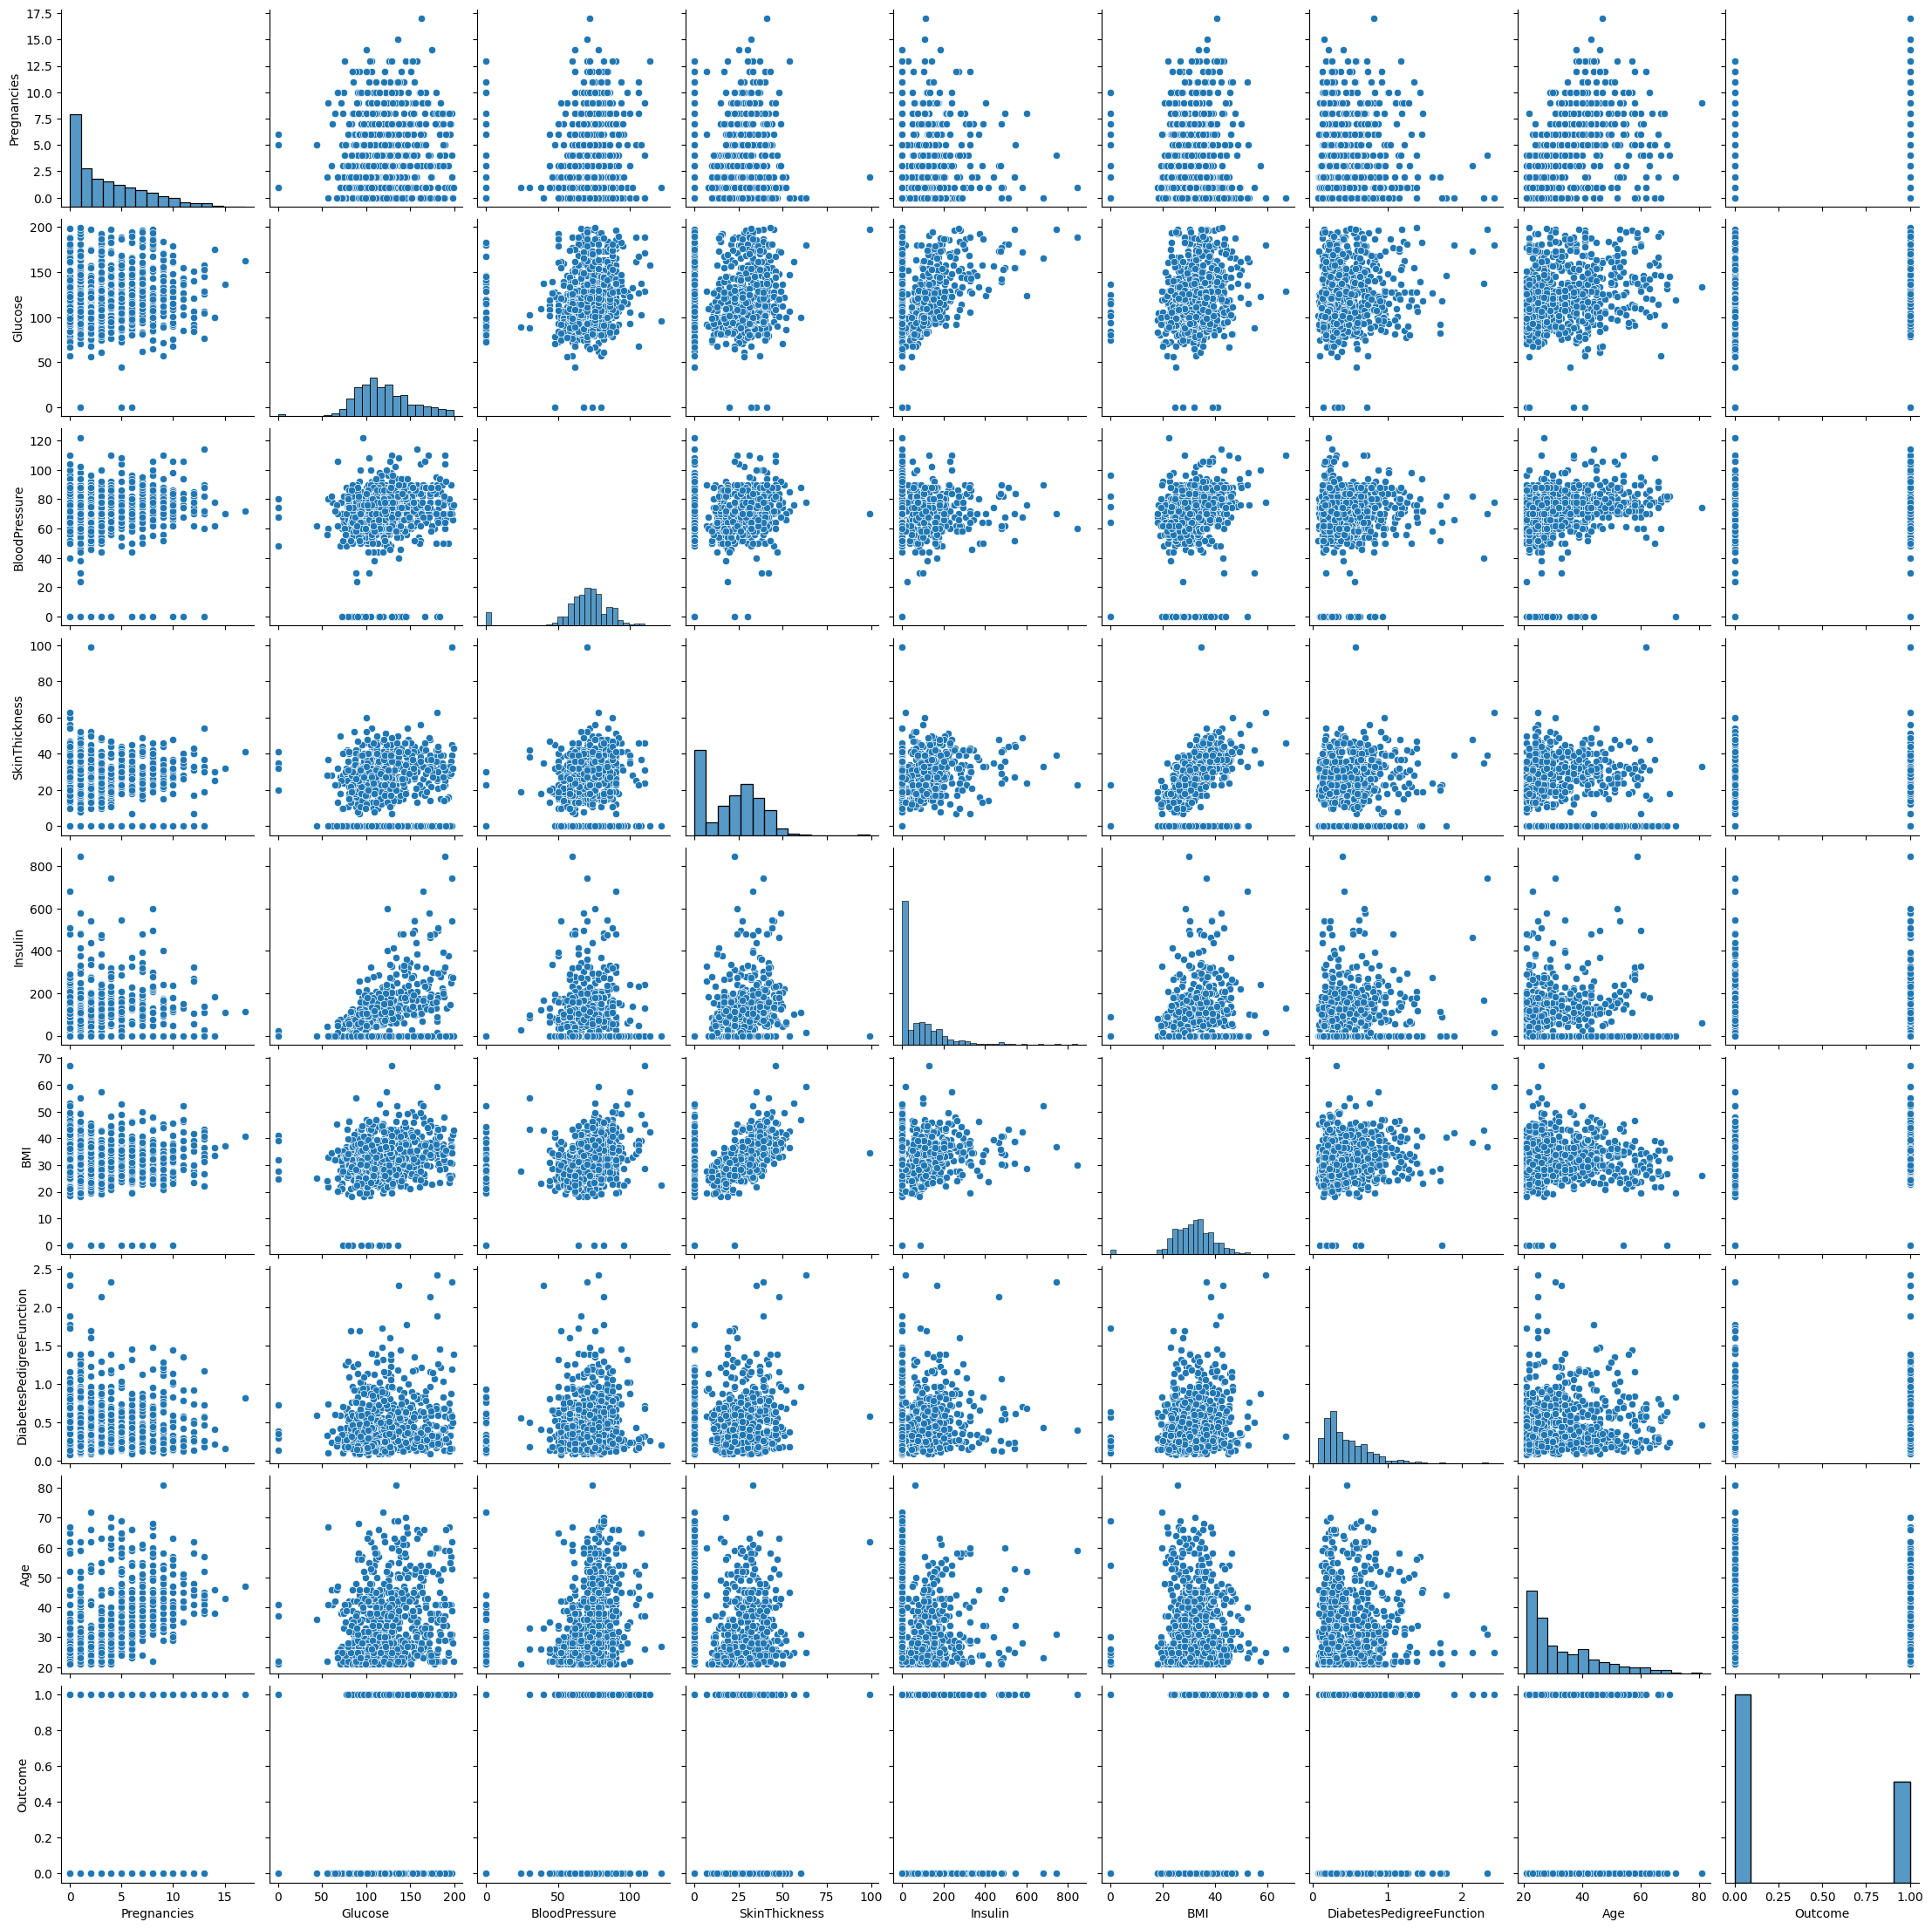

In [29]:
sns.pairplot(data = total_data)

Lo anterior indica que aparente las variables no tiene una relacion lineal entre si, corroboremos esto observado su correlacion.

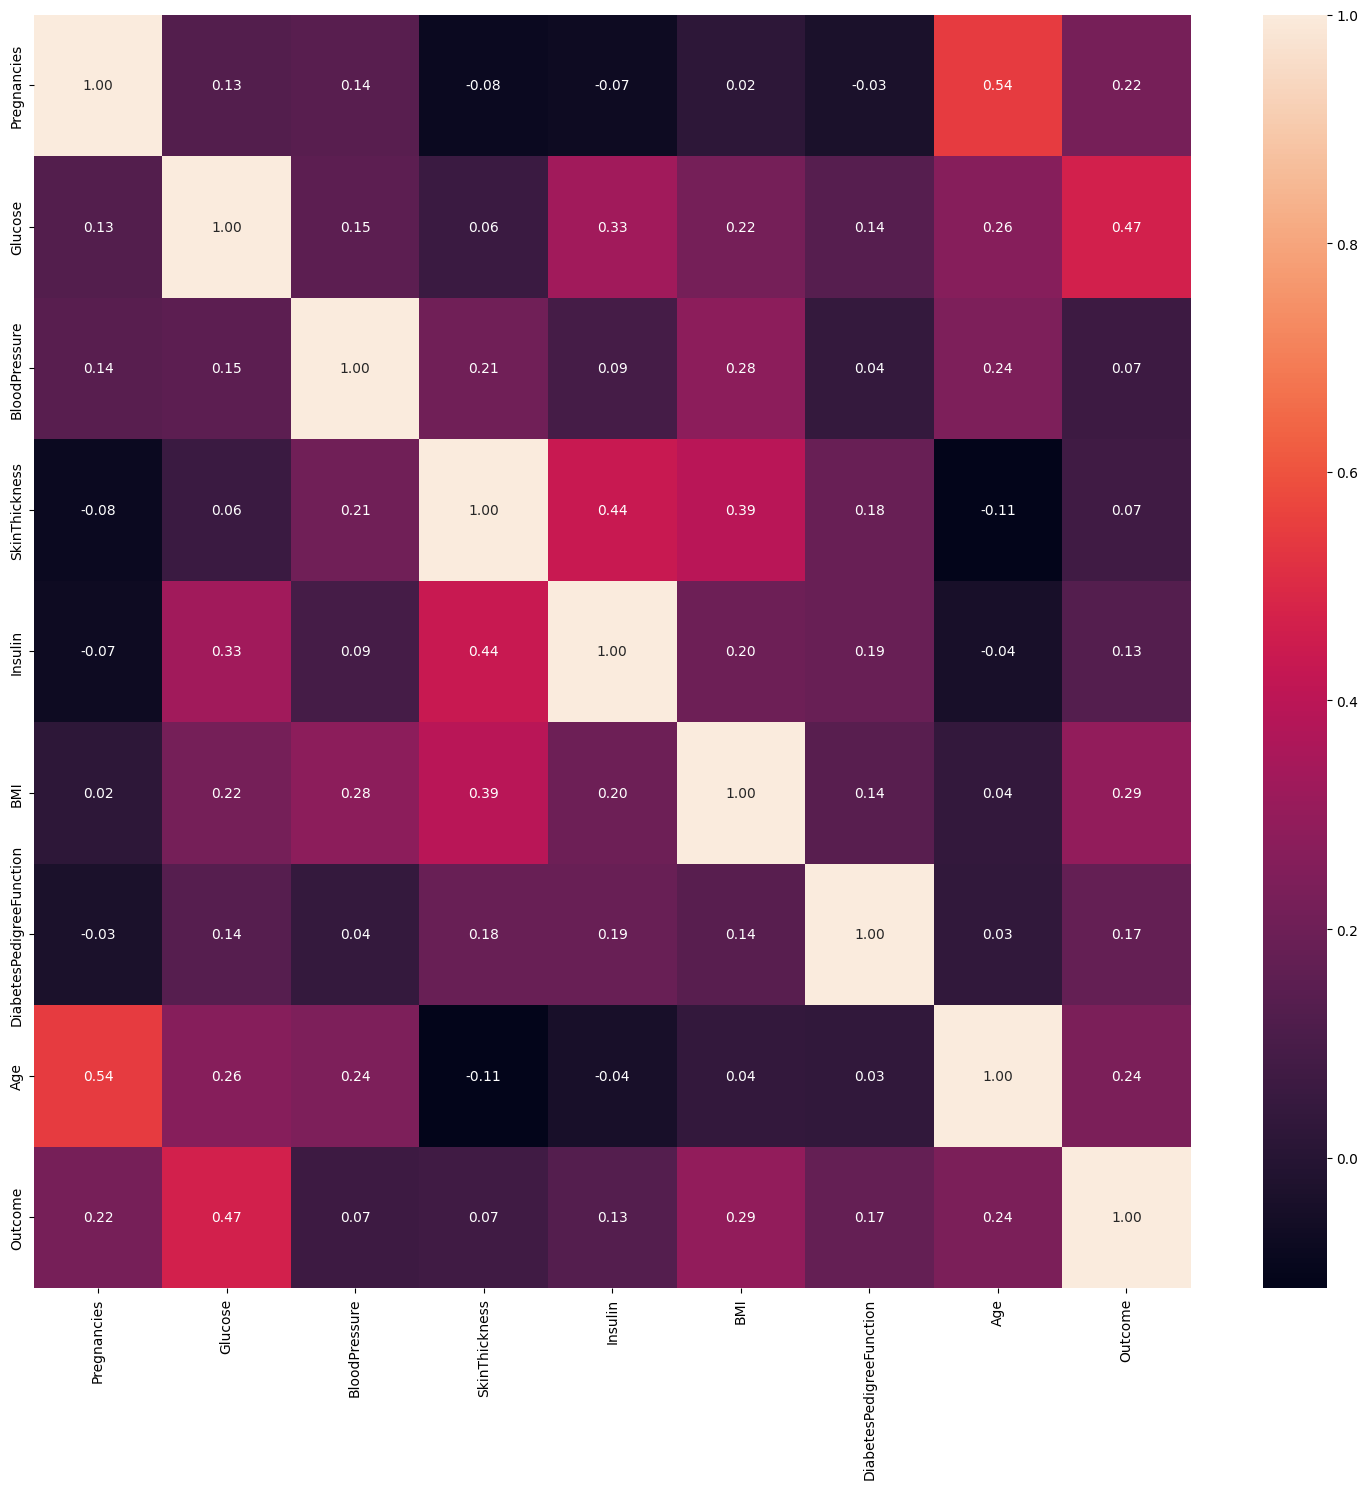

In [30]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Luego de observada la correlacion se puede decir que, las variables con mayor relacion moderada (<60%) en el mismo sentido son, en primera estancia las variable edad con numero de embarazos, la cual posee un 54% (0,54) seguida y la glucosa con la variable de estado de la diabetes, la cual tiene un 47% (0,47).

#### Ingenieria de caracteristicas

Veamos el resumen estadistico de las variables


In [31]:
total_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Lo anterior revela la presencia de datos extremos en las variables referidas, sin embargo se ha decidido trabajar con ellos, procedamos a escalar con la medida del maximo y minino para preservar el comportamiento distrbucional, aunque para un modelo de clasificacion no es necesario.


#### Seleccion de caracteristicas

Dado que queremos predecir la diabeltes la variable `Outcome` es nuestra variable que consideraremos que es influenciada por las demas, y procedemos a seleccionar la data de entrenamiento y la data de prueba.

In [32]:
# Selección de características

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0          2.0     84.0            0.0      0.0   0.0   
1          9.0    112.0           82.0      0.0  28.2   
2          1.0    139.0           46.0     83.0  28.7   
3          0.0    161.0           50.0      0.0  21.9   
4          6.0    134.0           80.0    370.0  46.2   

   DiabetesPedigreeFunction   Age  
0                     0.304  21.0  
1                     1.282  50.0  
2                     0.654  22.0  
3                     0.254  65.0  
4                     0.238  46.0

In [33]:
X_test_sel.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0          6.0     98.0           58.0    190.0  34.0   
1          2.0    112.0           75.0      0.0  35.7   
2          2.0    108.0           64.0      0.0  30.8   
3          8.0    107.0           80.0      0.0  24.6   
4          7.0    136.0           90.0      0.0  29.9   

   DiabetesPedigreeFunction   Age  
0                     0.430  43.0  
1                     0.148  21.0  
2                     0.158  21.0  
3                     0.856  34.0  
4                     0.210  50.0

In [35]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("clean_train.csv", index = False)
X_test_sel.to_csv("clean_test.csv", index = False)

### Paso 3: Construye un modelo de árbol de decisión

Para ello cargamos los datos

In [36]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0          2.0     84.0            0.0      0.0   0.0   
1          9.0    112.0           82.0      0.0  28.2   
2          1.0    139.0           46.0     83.0  28.7   
3          0.0    161.0           50.0      0.0  21.9   
4          6.0    134.0           80.0    370.0  46.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.304  21.0        0  
1                     1.282  50.0        1  
2                     0.654  22.0        0  
3                     0.254  65.0        0  
4                     0.238  46.0        1

Visualizaremos la relación de las variables con el objetivo, para ello usaremos el parallel_coordinates, la cual es una técnica de visualización de datos que se utiliza para trazar variables numéricas multivariadas:

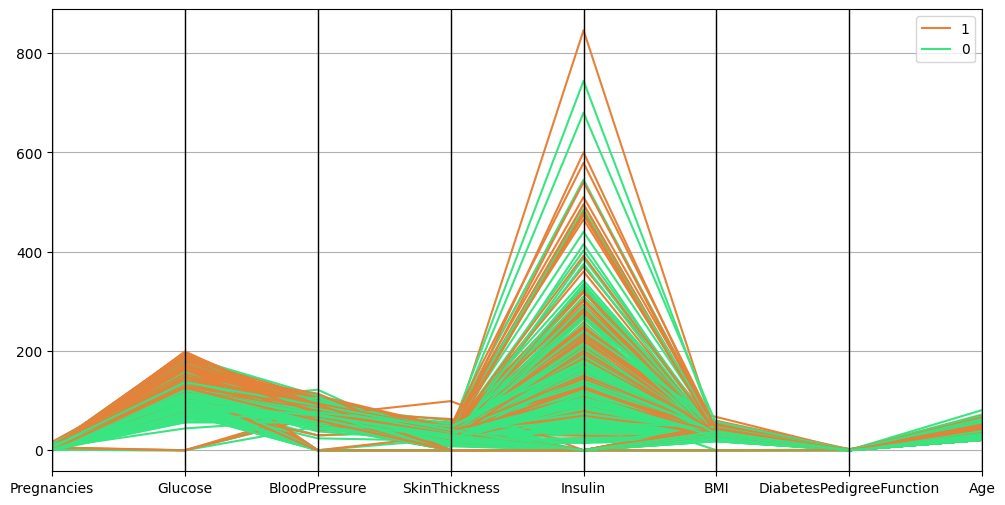

In [37]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

Aqui para cada variable podemos observar segun la variable asociada si es un paciente con diables (numero 1) o sin diabetes (numero 0),  ejemplo: 

+ `Glucose`: de las 798 observaciones se grafican cuales poseen diabetes y cuales no.

#### Procedamos a la inicializacion y entrenamiento del modelo

In [38]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Una vez que el modelo se ha entrenado correctamente, podemos visualizar el árbol con la misma librería. Esta visualización representa todos los pasos que ha seguido el modelo hasta la construcción del árbol. Además, se hace por niveles y de izquierda a derecha:

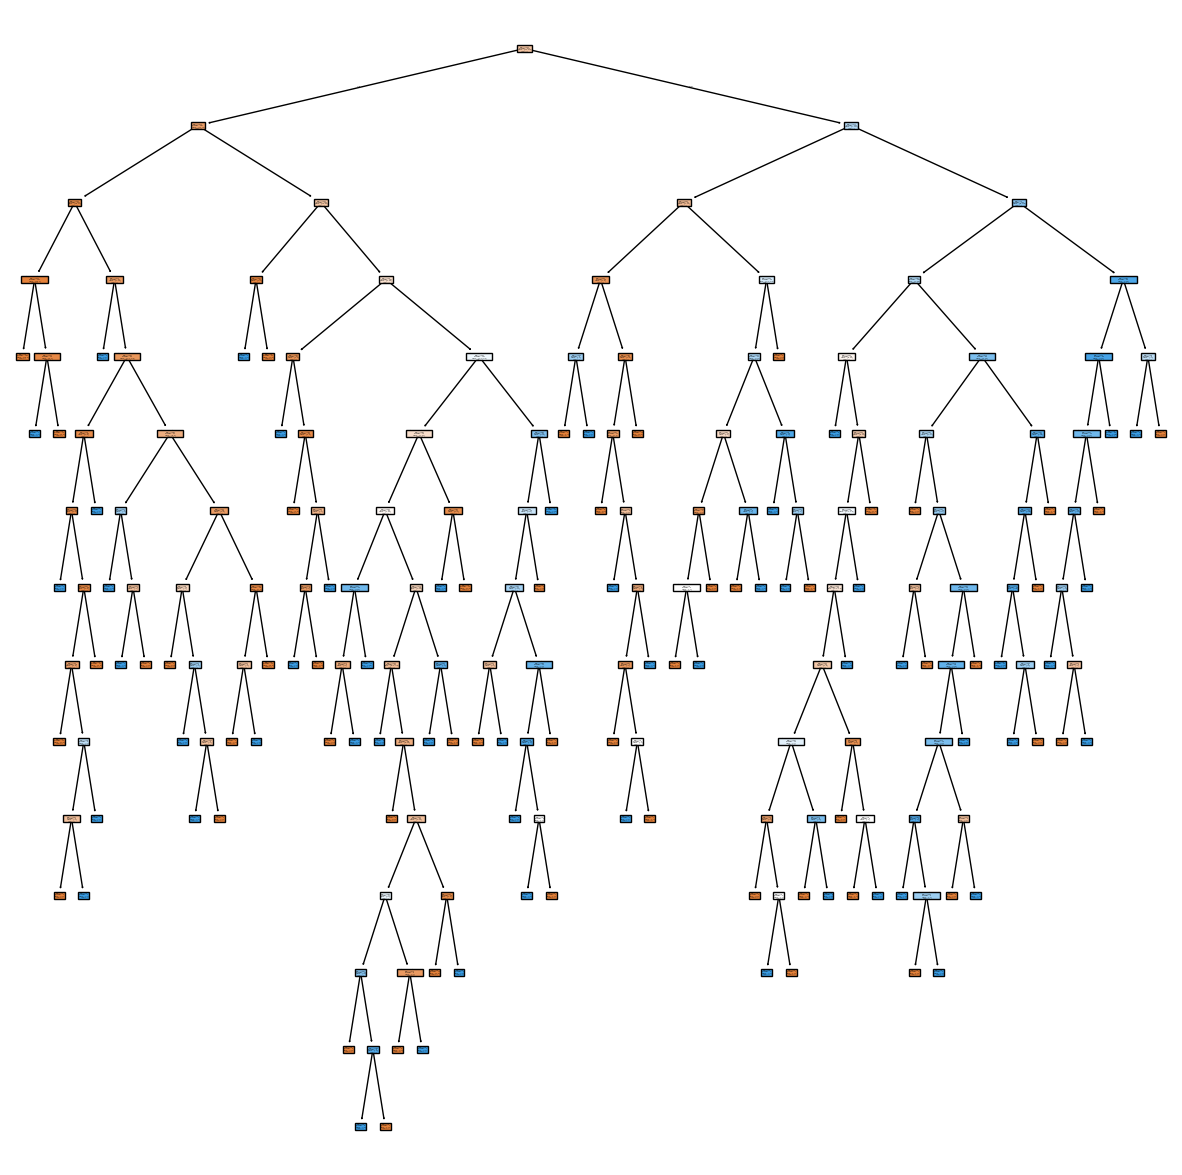

In [39]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

Dado que no podemos apreciar adecuadamente y para efectos academicos haremos otra corrida a fin de apreciar e interpretar la informacion de algunos nodos del arbol

In [40]:

def plot_tree_enlarged(model, feature_names, class_names, figsize=(20,20)):
    """
    Visualiza un árbol de decisión con nodos ampliados para mejor legibilidad.

    Args:
        model: El modelo de árbol de decisión entrenado.
        feature_names: Nombres de las características.
        class_names: Nombres de las clases.
        figsize: Tamaño de la figura.
    """

    fig = plt.figure(figsize=figsize)
    _ = tree.plot_tree(model, 
                       feature_names=feature_names, 
                       class_names=class_names, 
                       filled=True,
                       rounded=True,
                       fontsize=12)

    # Ajustar el espaciado entre los nodos
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
plot_tree_enlarged(model, list(X_train.columns), ["0", "1", "2"], figsize=(100, 100))

In [41]:
# Numero de nodos terminales
num_nodos_terminales = model.tree_.n_leaves
print("Numero de nodos terminales:", num_nodos_terminales)

Numero de nodos terminales: 105


In [43]:
# Funcion niveles de Arbol

def get_tree_depth(tree_, feature_names=None):
    """
    Calcula la profundidad (número de niveles) de un árbol de decisión.

    Args:
        tree_: El árbol de decisión entrenado.
        feature_names: (Opcional) Nombres de las características.

    Returns:
        int: La profundidad del árbol.
    """

    children_left = tree_.children_left
    children_right = tree_.children_right

    def recurse(node):
        if children_left[node] < 0:
            return 0
        left_height = 1 + recurse(children_left[node])
        right_height = 1 + recurse(children_right[node])
        return max(left_height, right_height)

    return recurse(0)

# Salida de la funcion:
depth = get_tree_depth(model.tree_)
print("La profundidad del árbol es:", depth)

La profundidad del árbol es: 14


En base a los resultados anteriores podemos indicar que:

+ El arbol posee 14 niveles.
+ Tenemos 105 nodos terminales.
+ En cada nodo se aprecia el valor del indice de Gini, criterio utilizado para medir el grado de pudeza de cada nodo. Mientras mas pequeño el indice de Gini implica un nodo mas puro.
+ Todos los nodos terminales poseen un indice de Gini cuyo valor es tan despreciable que es considerado nulo.

Interpretacion del nodo inicial (raiz o padre):

La variable que tiene mayor influencia en la presencia de la diabetes es la concentracion de glucosa, la cantidad de datos observados en el nodo raiz es de 614, de aqui se desprende el primer nivel para el cual se tiene dos alternativas:

+ 1. La presencia de la diabetes si esta determinada por la glucosa y esto depende de la edad.
+ 2. La presencia de la diabetes no esta determinada por la glucosa y esta depende del Indice de Masa Corporal.

#### Procedamos ahora al proceso de prediccion del modelo


In [44]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la precisión (accuracy), que es la fracción de predicciones que el modelo realizó correctamente.

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7597402597402597

Este resultado indica que, el modelo fue capaz de reproducir al rededor del 76% de la data de prueba.


### Paso 4: Optimizacion del modelo

Realicemos esto mediante el metodo de La búsqueda en cuadrícula (grid search), los hiperparametros a considerar seran para este caso:

+ El indice de Gini y la entropia.
+ La profundidad o niveles de ramificacion del arbol
+ Division minima de las muestras.
+ Muestras minimas a tomar.


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Ahora observemos cuales serian los mejores valores para los hiperametros 

In [49]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Lo mejores hiperparametros son: {grid.best_params_}")

Lo mejores hiperparametros son: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


Usemos la data de entrenamiento para ajustar el modelo con los mejores hiperparametros.

In [50]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

Una vez ajustado realicemos las predicciones pertinenes y luego comparemos predicciones con data de prueba

In [51]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7727272727272727

Respecto al modelo original podemos observar una mejora en el modelo de alrededor de 1%, lo cual es un bueno.

Procederemos a guardar la data

In [53]:
from pickle import dump

dump(model, open("tree_classifier.sav", "wb"))

